# Factors that impact the loan approval for an applicant
## by Ali Shaker

## Investigation Overview

> In this enquiry, I estimable to show oneself at the happening or visage walk could abeyant the loan applicant to get the approval status. The large ambition was on the manifold of the variables such as 'ProsperScore', 'IncomeRange', 'EmploymentStatus', 'Occupation','Term' , 'LoanStatus', 'StatedMonthlyIncome', 'Recommendations', 'LoanOriginalAmount' ,'BorrowerRate' , 'BorrowerHomeowner'.

## Dataset Overview

> This ProsperLoan data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

> To effortlessness of the visualization i need took main few variables Similarly as those one task destination itself says will concentrate on best couple variables.

## Summary and Insights

> EmploymentStatus of here Borrowers are with Employed State

> The appropriation of month to month pay of candidates is a privilege slanted on the grounds that there will be hardly any candidates with significant pay.

> LoanStatus with current and completed have own homes when they applied for loans

> We see that without property holder will in general have a higher loan cost, and in this manner lower rating.However property holder will in general have lower loan cost and higher rating. So we can securely say that mortgage holder is most secure wagered while gving a credit. We can likewise obviously see that HR thrive rating candidates have higher loan fees

> LoanStatus of all Borrowers are with current and completed state

> Majority of the loan applicants are from 50000 to 75000 range with emloyeed status

> Candidates with incomerange of 50000 to 75000 territory have their thrive rating falling under AA, A, B and C

> The monthly income of borrowers are having higher values for employed, other and full time employment status with the prosper rating of AA, A and B

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Univariate Exploration

In [3]:
#Because of numerous factors in this dataset,I only use few variables. Those are:
cols = ['Term' , 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (numeric)',
        'ProsperRating (Alpha)',
        'ProsperScore',                     
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'Occupation', 
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'Recommendations', 
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'Investors',
        'BorrowerState']

In [4]:
loan_df = df[cols]

In [5]:
# delete all the null rows from the data
loan_df = loan_df.dropna()

In [6]:
#convert term into category
loan_df['Term'] = loan_df['Term'].astype('category')

In [7]:
# final dataset, with no NULL values (TIDY dataset)
loan_df.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_Alpha', 
                        'ProsperRating (numeric)': 'ProsperRating_Numeric',
                        'ListingCategory (numeric)' : 'ListingCategory_Numeric'
                       }, inplace=True)

Identify the type of variables

In [8]:
#Numeric attributes
num_loan_df = loan_df.loc[:, (loan_df.dtypes == np.float64) | (loan_df.dtypes == np.int64)]
num_loan_df.columns

Index(['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
       'ProsperRating_Numeric', 'ProsperScore', 'ListingCategory_Numeric',
       'EmploymentStatusDuration', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount',
       'PercentFunded', 'Investors'],
      dtype='object')

In [9]:
#Categorical attributes
cat_loan_df = loan_df.loc[:, (loan_df.dtypes == 'object') | (loan_df.dtypes == 'category')]
cat_loan_df.columns

Index(['Term', 'LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus',
       'Occupation', 'IncomeRange', 'BorrowerState'],
      dtype='object')

In [10]:
# From above it seems the order has to be maintained becuase this is an ordinal variable
plt.figure(figsize = [10, 5]) 
ProsperRating_Alpha_classes = ['AA','A', 'B', 'C', 'D', 'E', 'HR']
IncomeRange_classes = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ProsperRating_Alpha_classes)
    loan_df['ProsperRating_Alpha'] = loan_df['ProsperRating_Alpha'].astype(vclasses)
    vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRange_classes)
    loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(vclasses_1)
else: # compatibility for v.20
    loan_df['ProsperRating_Alpha'] = loan_df['ProsperRating_Alpha'].astype('category', ordered = True,
                                                     categories = ProsperRating_Alpha_classes)
    loan_df['IncomeRange'] = loan_df['IncomeRange'].astype('category', ordered = True,
                                                     categories = IncomeRange_classes)

<Figure size 720x360 with 0 Axes>

## Loan Status of all Borrowers

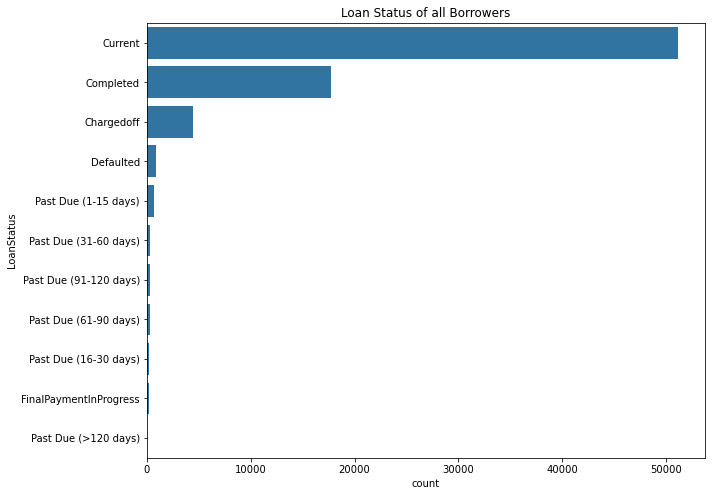

In [31]:
#LoanStatus
plt.figure(figsize = [10, 8]) 
base_color = sb.color_palette()[0]
plt.title("Loan Status of all Borrowers")
sb.countplot(data = loan_df, y = 'LoanStatus', color = base_color,
             order = loan_df['LoanStatus'].value_counts().index);

## EmploymentStatus of all Borrowers

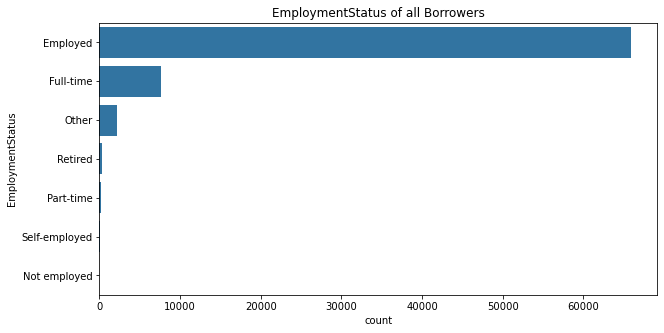

In [12]:
#EmploymentStatus
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
plt.title("EmploymentStatus of all Borrowers")
sb.countplot(data = loan_df, y = 'EmploymentStatus', color = base_color,
             order = loan_df['EmploymentStatus'].value_counts().index);

In [13]:
loan_df_1 = loan_df[loan_df['IncomeRange'] != 'Not employed']

## Income Range of all Borrowers

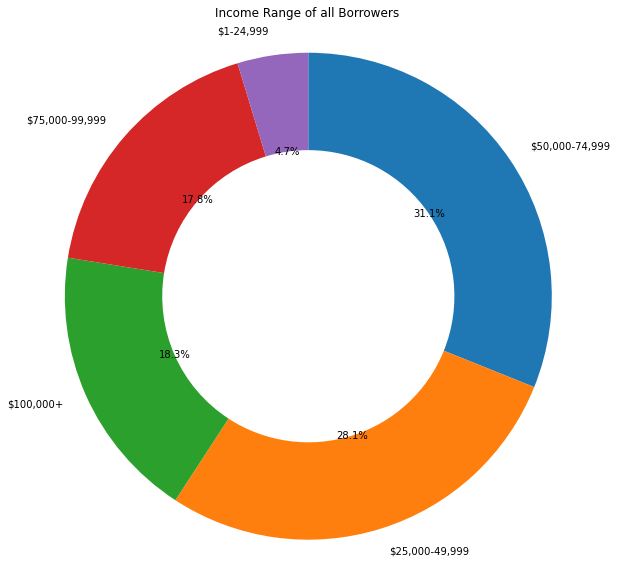

In [33]:
plt.figure(figsize = [20, 10])
sorted_counts = loan_df_1['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4}, autopct   = '%.1f%%');
plt.title("Income Range of all Borrowers")
plt.axis('square');

## Prosper Score of all Borrowers

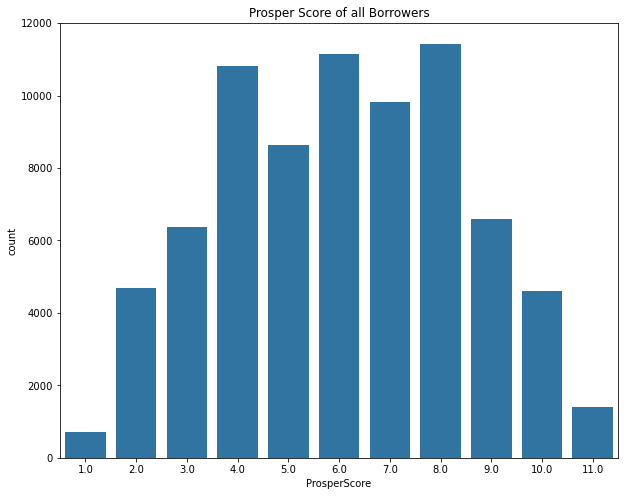

In [34]:
#'Occupation'
plt.figure(figsize = [10, 8]) 
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'ProsperScore', color = base_color);
plt.title("Prosper Score of all Borrowers");


## Stated Monthly Income of all Borrowers

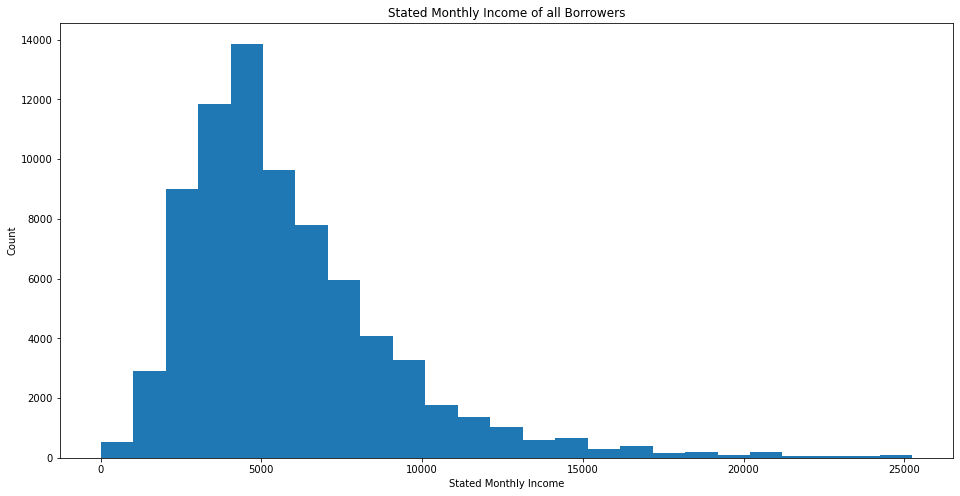

In [35]:
plt.figure(figsize = [16, 8])
loan_df_sub = loan_df[loan_df['StatedMonthlyIncome'] <= 25000]
bin_edges = np.arange(0, loan_df_sub['StatedMonthlyIncome'].max()+1010, 1010)
plt.hist(data = loan_df, x = 'StatedMonthlyIncome', bins = bin_edges);
plt.xlabel('Stated Monthly Income');
plt.ylabel('Count');
plt.title("Stated Monthly Income of all Borrowers");

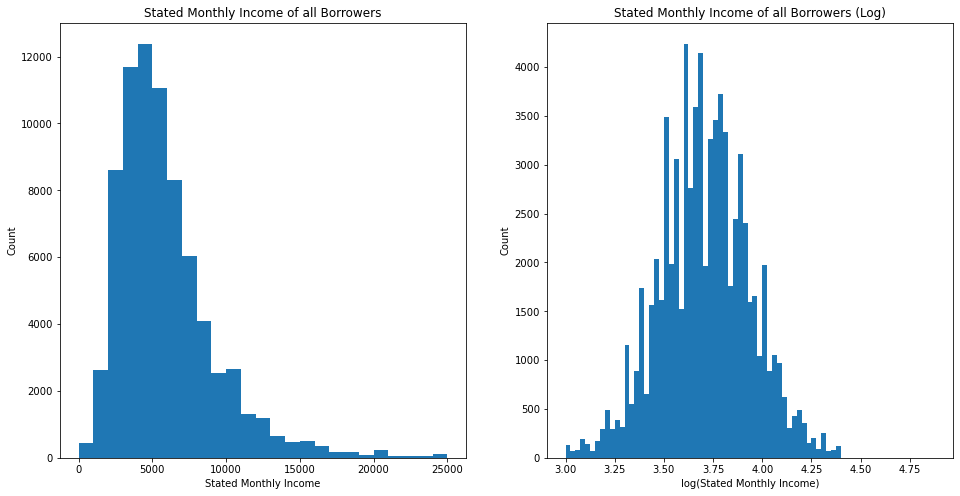

In [36]:
plt.figure(figsize = [16, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df_sub['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data =loan_df_sub, x = 'StatedMonthlyIncome', bins = bin_edges)
plt.xlabel('Stated Monthly Income')
plt.ylabel('Count');
plt.title("Stated Monthly Income of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df_sub['StatedMonthlyIncome']) # direct data transform
log_bin_edges = np.arange(3, log_data.max()+0.5, 0.025)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(Stated Monthly Income)');
plt.ylabel('Count');
plt.title("Stated Monthly Income of all Borrowers (Log)");



# Without log transformation looks good on StatedMonthlyIncome

## Loan Original Amount of all Borrowers

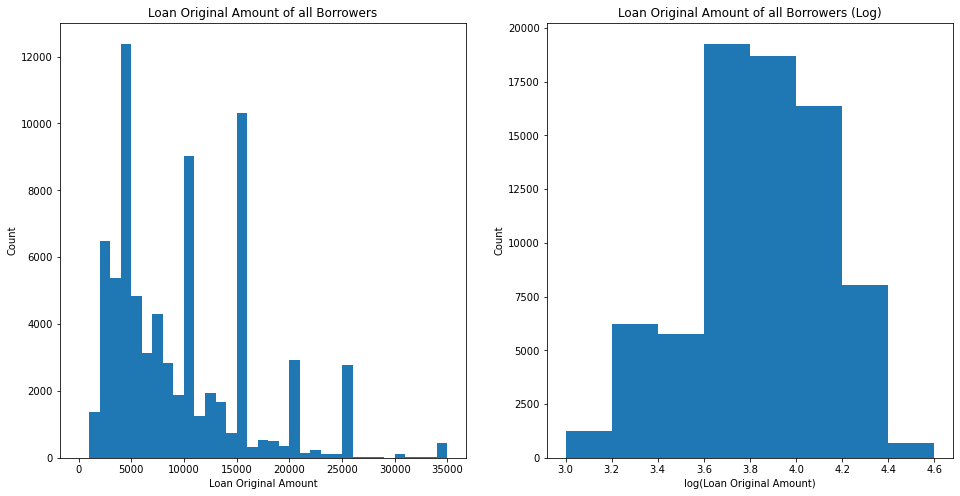

In [37]:
plt.figure(figsize = [16, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data =loan_df, x = 'LoanOriginalAmount', bins = bin_edges)
plt.xlabel('Loan Original Amount')
plt.ylabel('Count');
plt.title("Loan Original Amount of all Borrowers");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df['LoanOriginalAmount']) # direct data transform
log_bin_edges = np.arange(3.0, log_data.max()+0.1, 0.2)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(Loan Original Amount)');
plt.ylabel('Count');
plt.title("Loan Original Amount of all Borrowers (Log)");

loan_df['LoanOriginalAmount_log'] = np.log10(loan_df['LoanOriginalAmount'])


## Investors of all Borrowers

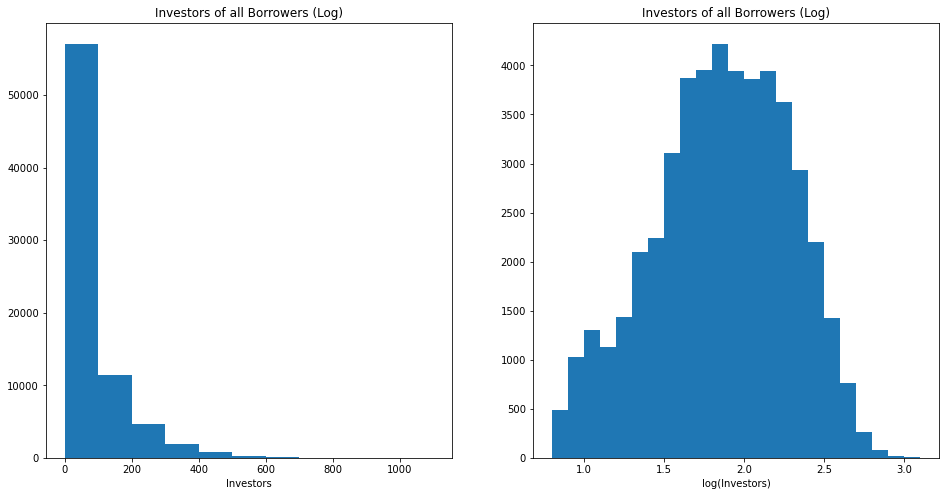

In [38]:
plt.figure(figsize = [16, 8])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, loan_df['Investors'].max()+10, 100)
plt.hist(data =loan_df, x = 'Investors', bins = bin_edges)
plt.xlabel('Investors')
plt.title("Investors of all Borrowers (Log)");

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(loan_df['Investors']) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(Investors)')
plt.title("Investors of all Borrowers (Log)");

loan_df['Investors_log'] = np.log10(loan_df['Investors'])

# Insights with Numerical variables analysis
## Investors
#### Majority of the investors are between 0 and 100
## LoanOriginalAmount
#### The origination amount of the loan.Now this is interesting. Here we see that the distribution is a right skewed with multiple peaks observed at 4000 USD, 10000 USD and 15000 USD.
## BorrowerRate
#### The Borrower's interest rate for this loan. The borrowers rate follow an approximately unimodal distribution, with the peak around 0.16. There seems to be a spike that occurs around 0.32.
## StatedMonthlyIncome
#### The monthly income the borrower stated at the time the listing was created. Monthly Income will definitely be right skewed since very few people will be having a higher salary. So I cut the outliers and made the data to look at log 10 scales. Majority of the borrowers are having a salary with less than 10000 USD and the peak is observed at 5000 USD

## Bivariate Exploration

## Relationship between two numeric variables

In [20]:
numeric_vars = ['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
                'ProsperRating_Numeric', 'ProsperScore', 
                'ListingCategory_Numeric','EmploymentStatusDuration', 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount','PercentFunded', 'Investors', 'LoanOriginalAmount_log',
                 'Investors_log']

numeric_vars_1 = ['BorrowerRate',
                 'ProsperScore',                 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'LoanOriginalAmount', 'Investors' ,'LoanOriginalAmount_log',
                 'Investors_log']

categoric_vars = ['LoanStatus', 'ProsperRating_Alpha', 'EmploymentStatus', 'Occupation',
       'IncomeRange', 'BorrowerState', 'Term', 'IsBorrowerHomeowner']

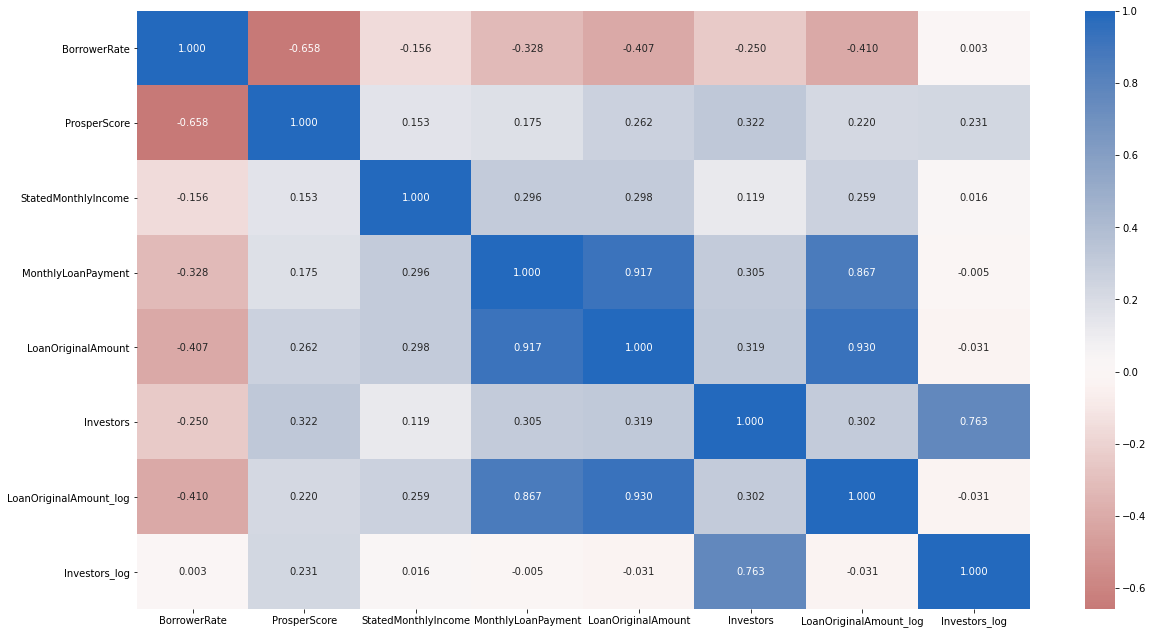

In [39]:
# correlation plot
plt.figure(figsize = [20, 11])
sb.heatmap(loan_df[numeric_vars_1].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

## Relationship between numeric & categorical variables

#### Income Range vs Loan Amount

Text(0.5, 1.0, 'Income Range vs Loan Amount')

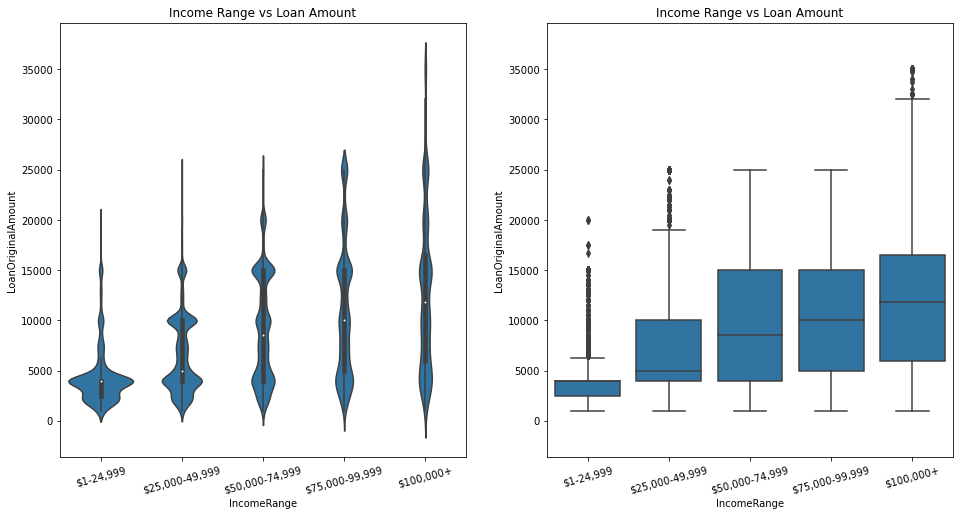

In [40]:
loan_df_sub = loan_df[(loan_df['StatedMonthlyIncome'] <= 10000) ]
loan_df_sub = loan_df_sub[loan_df_sub['IncomeRange'] != 'Not employed']


plt.figure(figsize = [16, 8])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = loan_df_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

## Categorical variables analysis

### Homeowner status vs Loanstatus ( Applicants Count)

#### We can obviously see from beneath that , candidates who have their ownhomes have higher rely on "Finished" and "Current" status. This unmistakably shows to get the Loanstatus or credit endorsement, Homeowner status is one of the significant factor.

## Count of Applicants w.r.t LoanS tatus and HomeownerStatus

Text(0.5, 1.0, 'Count of Applicants w.r.t LoanS tatus and HomeownerStatus')

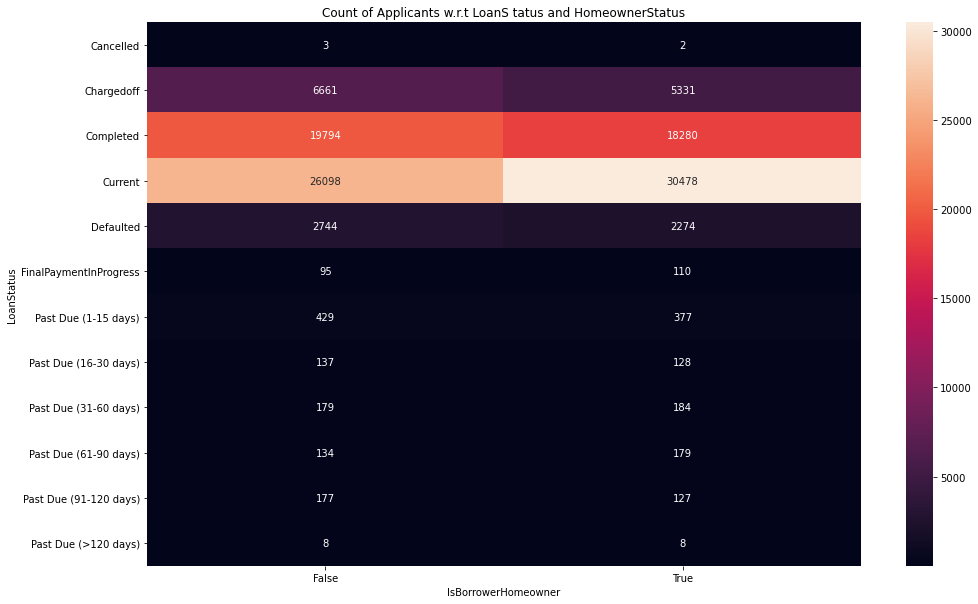

In [41]:
plt.figure(figsize = [16, 10])
ct_counts = df.groupby(['IsBorrowerHomeowner', 'LoanStatus']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'IsBorrowerHomeowner', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd');
plt.title('Count of Applicants w.r.t LoanS tatus and HomeownerStatus')

## Prosper rating dependency on Employment status and Income Range
#### For all the high appraising categries like AA, A, B, C , it is very clear from the charts that the endorsement of advances are significantly rely upon the candidates pay range and Employment status.

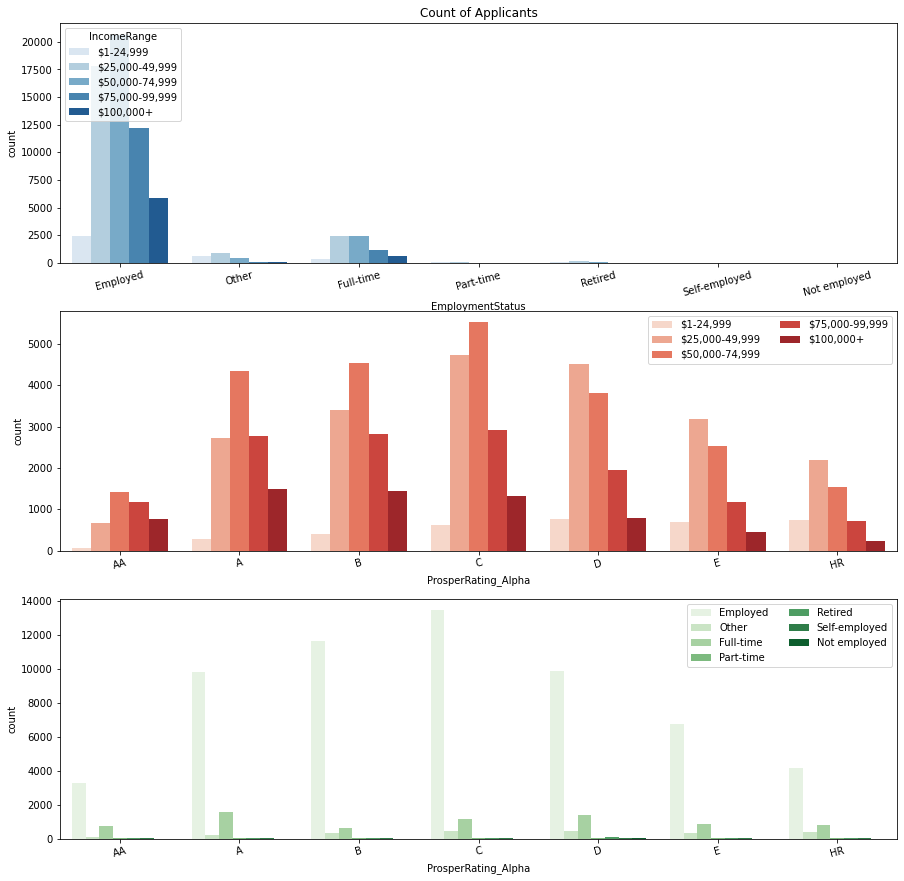

In [42]:
categoric_vars = ['EmploymentStatus', 'ProsperRating_Alpha', 'IncomeRange']

plt.figure(figsize = [15, 15])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = loan_df_sub, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')
plt.xticks(rotation = 15)
plt.title('Count of Applicants')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'IncomeRange', palette = 'Reds')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)


# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_df_sub, x = 'ProsperRating_Alpha', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15)


plt.show()

## Insights about the entire Bivariate analysis
> Larger part of the borrowers with most elevated advance sum are taken by Employed, this is trailed by others and fulltime workers

> LoanOriginalAmount is most elevated for An and B Prosper appraisals, when contrasted and pay run - it is following an ordinary or expected pattern that more pay borrowers are having higher loanoriginalamount

> Majority of the loan applicants are from 50000 to 75000 range with emloyeed status

> Credit unique sum and month to month advance installment is profoundly associated and it is normal and borrowers financing cost and appropriate score are exceptionally corresponded(- vely)

> The range of the salaries stated is higher for employed borrowers.

> LoanStatus with current and finished have own homes when they applied for advances

> Applicants with incomerange of 50000 to 75000 range have their prosper rating falling under AA, A, B and C


## Multivariate Exploration

## identify how the applicants mean monthly income is spread across

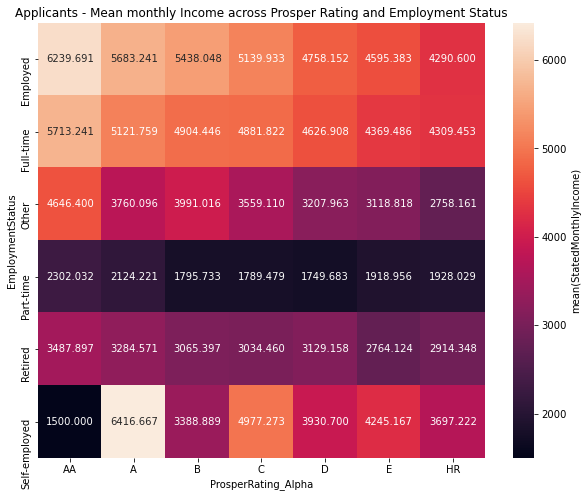

In [43]:
# To identify how the applicants mean monthly income is spread across
plt.figure(figsize = [10, 8])
loan_df_sub = loan_df_sub[loan_df_sub['EmploymentStatus'] != 'Not employed']

cat_means = loan_df_sub.groupby(['ProsperRating_Alpha', 'EmploymentStatus']).mean()['StatedMonthlyIncome']
cat_means = cat_means.reset_index(name = 'StatedMonthlyIncome_avg')
cat_means = cat_means.pivot(index = 'EmploymentStatus', columns = 'ProsperRating_Alpha',
                            values = 'StatedMonthlyIncome_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(StatedMonthlyIncome)'});
plt.title('Applicants - Mean monthly Income across Prosper Rating and Employment Status');

### Applicants rating with monthly income and Employment Status

> High appraising is given to candidates with representative status having utilized and full time and these appicants have higher month to month pay

## identify how the applicants rating is affected by Employment status and Monthly income

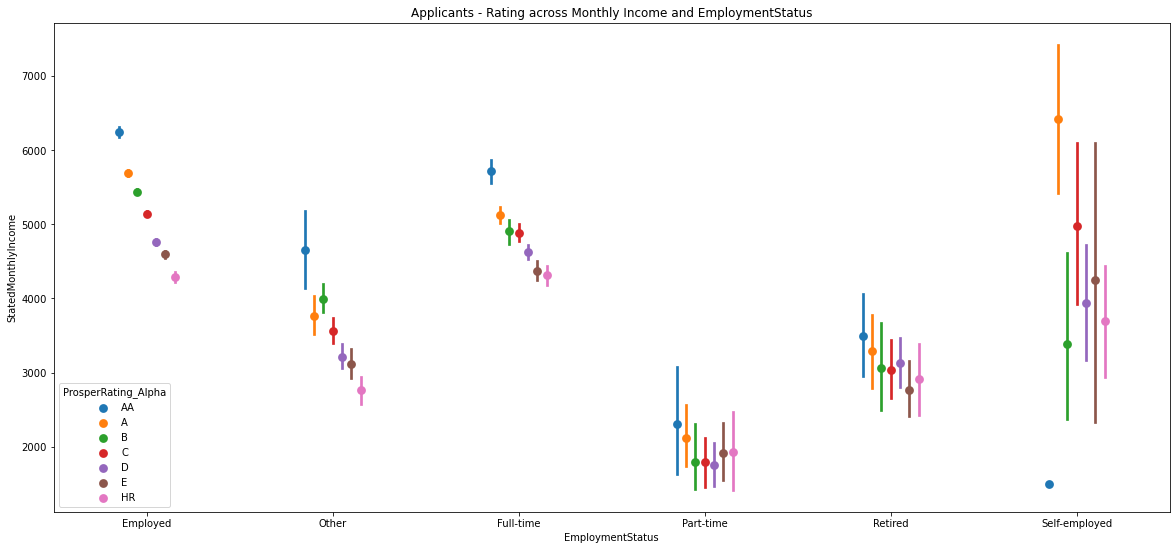

In [44]:
# To identify how the applicants rating is affected by Employment status and Monthly income
plt.figure(figsize = [20, 9])
ax = sb.pointplot(data = loan_df_sub, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating_Alpha',
                  dodge = 0.3, linestyles = "")
plt.title('Applicants - Rating across Monthly Income and EmploymentStatus');

## Applicants rating with borrwers interest rate and homeowner status

> We see that without mortgage holder will in general have a higher loan fee, and along these lines lower rating.However property holder will in general have lower financing cost and higher rating. So we can securely say that mortgage holder is most secure wagered while gving an advance. We can likewise plainly see that HR succeed rating candidates have higher financing costs 


## identify how the applicants interest rate is affected by ratings

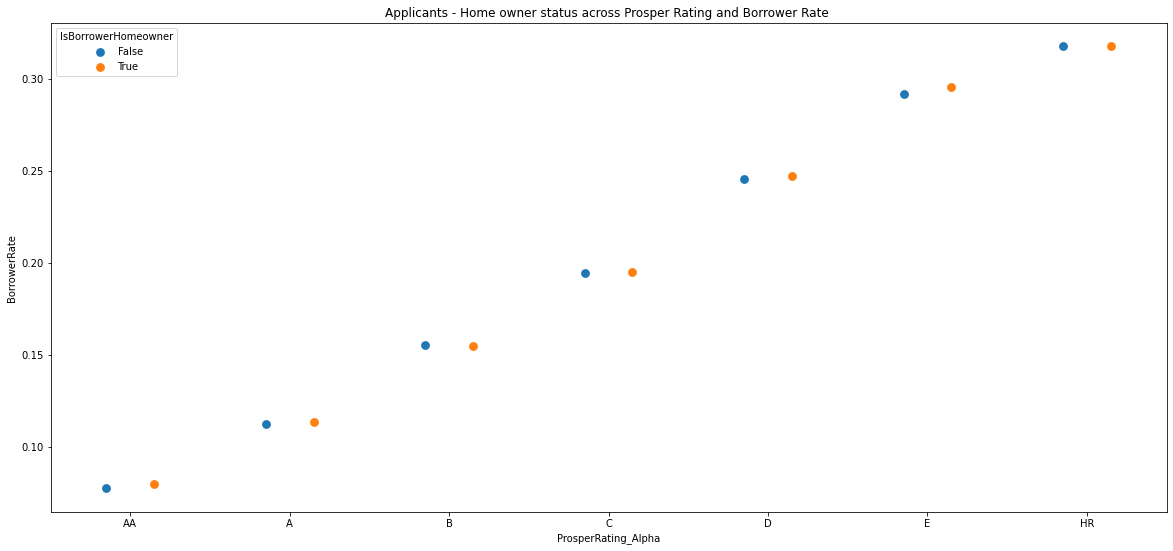

In [46]:
# To identify how the applicants interest rate is affected by ratings
plt.figure(figsize = [20, 9])
ax = sb.pointplot(data = loan_df_sub, x = 'ProsperRating_Alpha', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                  dodge = 0.3, linestyles = "");
plt.title('Applicants - Home owner status across Prosper Rating and Borrower Rate ');

### To conclude this analysis , I say that the loan approval status is heavily dependent on the applicant's information on IncomeRange, Homeownerstatus and employment status.

### Insights from the multivariate exploration data

> Utilized and full time representatives have their mean pay rates in higher range

> The monthly income of borrowers are having higher values for employed, other and full time employment status with the prosper rating of AA, A and B

> For Applicants with thrive appraisals from AA to D have the higher credit sum with expanded pay

> Majority of the borrowers are falling under prosper rating of B , irrespective of the income range

> We see that without mortgage holder will in general have a higher loan fee, and accordingly lower rating.However mortgage holder will in general have lower financing cost and higher rating. So we can securely say that property holder is most secure wagered while gving a credit. We can likewise plainly see that HR succeed rating candidates have higher loan fees
